<a href="https://colab.research.google.com/github/youssef-gis/nyc_vehicule_collisions/blob/main/nyc_vehicule_collisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import


In [17]:
import numpy as np
import pandas as pd
import datetime as dt
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Motor_Vehicle_Collisions_-_Crashes.csv')

# let's pull up the data dictionary supplied by the Open Data website for reference.
data_inf= pd.read_excel("https://data.cityofnewyork.us/api/views/h9gi-nx95/files/2e58023a-21a6-4c76-b9e8-0101bf7509ca?download=true&filename=MVCollisionsDataDictionary.xlsx",
                         sheet_name='Column Info',  header=1)

# Understanding the Data

In [5]:
pd.set_option('display.max_columns', None) # This allows us to view all columns in a dataframe when called
pd.set_option('display.max_rows', 100) # This returns 100 rows at max to prevent accidents when writing code
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,11/09/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,26/03/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,29/06/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,0.0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,11/09/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,0.0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,14/12/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,0.0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [6]:
#Standardize Column Names
data.columns= data.columns.str.lower().str.replace(' ', '_')

#Drop Irrelevant and Highly Sparse Columns
df = data.drop(columns=['contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5', 'vehicle_type_code_3','vehicle_type_code_4',
'vehicle_type_code_5','on_street_name','off_street_name','cross_street_name','location'], axis=1)

#Combine Date and Time into Datetime
data['crash_datetime']= pd.to_datetime(data['crash_date'].astype(str) + ' ' + data['crash_time'] , dayfirst=True)

# Fill missing boroughs  mark as 'Unknown'
df['borough'] = df['borough'].fillna('Unknown')

In [7]:
pd.options.display.max_info_rows = 2000000
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179921 entries, 0 to 179920
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     179921 non-null  object        
 1   crash_time                     179921 non-null  object        
 2   borough                        118160 non-null  object        
 3   zip_code                       118137 non-null  float64       
 4   latitude                       164788 non-null  float64       
 5   longitude                      164788 non-null  float64       
 6   location                       164788 non-null  object        
 7   on_street_name                 130909 non-null  object        
 8   cross_street_name              83247 non-null   object        
 9   off_street_name                49010 non-null   object        
 10  number_of_persons_injured      179920 non-null  float64       
 11  

## Find the percentage of the missing values and see which columns have the most amount of missing values

In [8]:
data.isnull().mean().round(4) * 100

,0
crash_date,0.00
crash_time,0.00
borough,34.33
zip_code,34.34
latitude,8.41
longitude,8.41
location,8.41
on_street_name,27.24
cross_street_name,53.73
off_street_name,72.76


In [22]:
#Standardize Column Names
data.columns= data.columns.str.lower().str.replace(' ', '_')

#Drop Irrelevant and Highly Sparse Columns
df = data.drop(columns=['contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5', 'vehicle_type_code_3','vehicle_type_code_4',
'vehicle_type_code_5','on_street_name','off_street_name','cross_street_name','location'], axis=1)

#Combine Date and Time into Datetime
df['crash_datetime']= pd.to_datetime(data['crash_date'].astype(str) + ' ' + data['crash_time'] , dayfirst=True)

# Fill missing boroughs  mark as 'Unknown'
df['borough'] = df['borough'].fillna('Unknown')

In [23]:
data.describe()

,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,collision_id,crash_datetime
count,118137.000000,164788.000000,164788.000000,179920.000000,179921.000000,179921.000000,179921.000000,179921.000000,179921.000000,179921.000000,179921.000000,1.799210e+05,179921
mean,10891.804727,40.156977,-72.885159,0.478496,0.002601,0.072376,0.001095,0.046137,0.000172,0.339093,0.001184,4.471382e+06,2021-11-02 01:52:59.639175168
min,10000.000000,0.000000,-74.254845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.073803e+06,2021-01-01 00:00:00
25%,10457.000000,40.665257,-73.961350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.426272e+06,2021-06-09 16:09:00
50%,11208.000000,40.713274,-73.919020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.471293e+06,2021-10-24 00:53:00
75%,11238.000000,40.784050,-73.865387,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.516302e+06,2022-04-02 01:45:00
max,11697.000000,40.912884,0.000000,40.000000,3.000000,6.000000,2.000000,3.000000,1.000000,40.000000,3.000000,4.700832e+06,2024-02-05 12:37:00
std,523.246279,4.776250,8.668064,0.802098,0.053386,0.272514,0.033406,0.213355,0.013125,0.773713,0.037480,5.229195e+04,NaN


In [24]:
data['vehicle_type_code_1'].value_counts().head(20)

,count
vehicle_type_code_1,
Sedan,85122
Station Wagon/Sport Utility Vehicle,62844
Taxi,4550
Pick-up Truck,3697
Box Truck,3078
Bus,2985
Bike,2575
E-Bike,1541
Motorcycle,1481


# Feature Engineering

In [25]:
#Temporal Features
df['hour'] = df['crash_datetime'].dt.hour
df['day_of_week'] = df['crash_datetime'].dt.day_name()
df['month'] = df['crash_datetime'].dt.month_name()
df['year'] = df['crash_datetime'].dt.year

#Injury/Killed Aggregation
df['total_injured']=df[['number_of_persons_injured', 'number_of_cyclist_injured', 'number_of_motorist_injured']].sum(axis=1)
df['total_killed']=df[['number_of_persons_killed', 'number_of_cyclist_killed', 'number_of_motorist_killed']].sum(axis=1)

#Spatial Processing
df_valid_coords = df[(df['longitude'].notnull()) & (df['latitude'].notnull())]
gdf = gpd.GeoDataFrame(df_valid_coords, geometry=gpd.points_from_xy(df_valid_coords['longitude'], df_valid_coords['latitude'], crs='EPSG:4326'))

#Vehicle Crashes involved in by DAY/NIGHT
df['DaY/NIGHT']=  df['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')


# Exploratory Data Analysis (EDA)

In [32]:
#Frequency of Vehicle Crashes By Borough
print(df['borough'].value_counts())

# Number of injuries and death
print(f"\nNumber of injuries: {df['total_injured'].sum()} \n Number of deaths: {df['total_killed'].sum()}")

# Contributing Factors analysis
print(f"\n{df['contributing_factor_vehicle_1'].value_counts().head(10)}\n")

# Vehicle Type Distribution related to Crashes
print(df['vehicle_type_code_1'].value_counts().head(10))

borough
Unknown          61761
BROOKLYN         40823
QUEENS           31815
BRONX            21681
MANHATTAN        19365
STATEN ISLAND     4476
Name: count, dtype: int64

Number of injuries: 155402.0 
 Number of deaths: 712

contributing_factor_vehicle_1
Unspecified                       44464
Driver Inattention/Distraction    43651
Failure to Yield Right-of-Way     12280
Following Too Closely             11876
Passing or Lane Usage Improper     8105
Passing Too Closely                6946
Unsafe Speed                       6286
Backing Unsafely                   5704
Traffic Control Disregarded        5068
Other Vehicular                    4790
Name: count, dtype: int64

vehicle_type_code_1
Sedan                                  85122
Station Wagon/Sport Utility Vehicle    62844
Taxi                                    4550
Pick-up Truck                           3697
Box Truck                               3078
Bus                                     2985
Bike                      

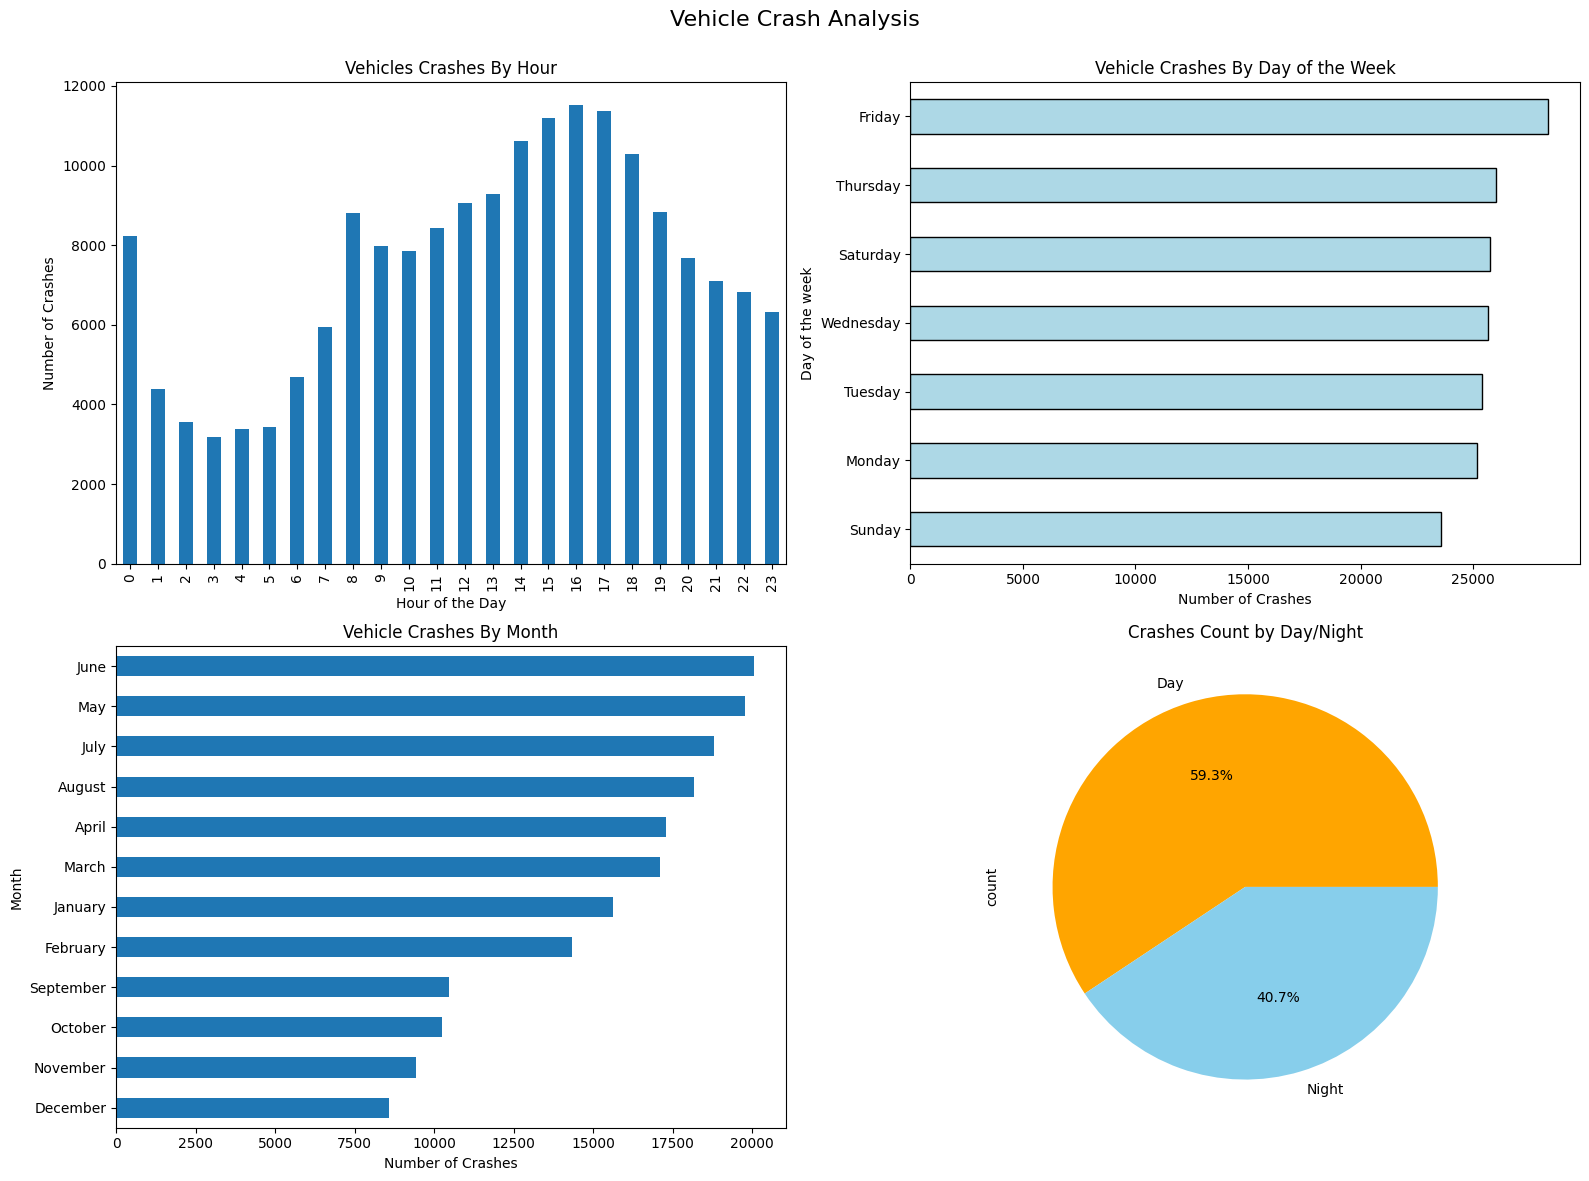

In [33]:
# plot Vehicle Crashes by hour, day of the week and month
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Vehicle Crash Analysis', fontsize=16)

df['hour'].value_counts().sort_index().plot(kind='bar',  ax=axes[0, 0], title='Vehicles Crashes By Hour')
axes[0, 0].set_xlabel('Hour of the Day')
axes[0, 0].set_ylabel('Number of Crashes')

df['day_of_week'].value_counts().sort_values(ascending=True).plot(kind='barh', ax=axes[0, 1], color='lightblue', edgecolor='black',title='Vehicle Crashes By Day of the Week')
axes[0, 1].set_xlabel('Number of Crashes')
axes[0, 1].set_ylabel('Day of the week')

df['month'].value_counts().sort_values(ascending=True).plot(kind='barh',ax=axes[1, 0],
title='Vehicle Crashes By Month')
axes[1, 0].set_xlabel('Number of Crashes')
axes[1, 0].set_ylabel('Month')

# Crashes count by Day/Night
day_night_crashes= df['DaY/NIGHT'].value_counts()
day_night_crashes.plot(kind='pie',  ax=axes[1, 1], autopct='%1.1f%%', colors=['orange', 'skyblue'], title='Crashes Count by Day/Night')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust for the main title
plt.show()

The visualization offers a clear and insightful temporal analysis of vehicle crashes in New York City, shedding light on when most accidents occur and how patterns shift across different timeframes. Here's a summary of the findings illustrated in your charts:

### 📈 Crashes by Hour
The number of vehicle crashes spikes sharply during late afternoon hours, peaking around **4–6 PM**, likely due to evening rush hour traffic. A smaller peak occurs around **8 AM**, indicating a **morning rush hour** trend.

### 📅 Crashes by Day of the Week
**Fridays** witness the highest number of crashes, followed closely by **Thursdays** and **Saturdays**, suggesting that the end of the workweek and weekend onset see increased traffic activity and possibly more **risky driving behavior**.

### 📆 Crashes by Month
The **summer months**, particularly **June** and **May**, record the highest crash counts. This trend might be influenced by increased **travel**, **tourism**, and more vehicles on the road during warmer months.

### 🌞 Day vs 🌙 Night Crashes
The pie chart reveals that **59.3%** of the crashes happen during the **day**, while **40.7%** occur at **night**. This indicates that despite higher visibility and possibly more traffic enforcement during daylight, a significant portion of crashes still happens during these hours — likely due to **volume**.

---

Together, these visualizations highlight **temporal patterns** in crash occurrences and help identify **critical periods** for traffic safety interventions and resource allocation.


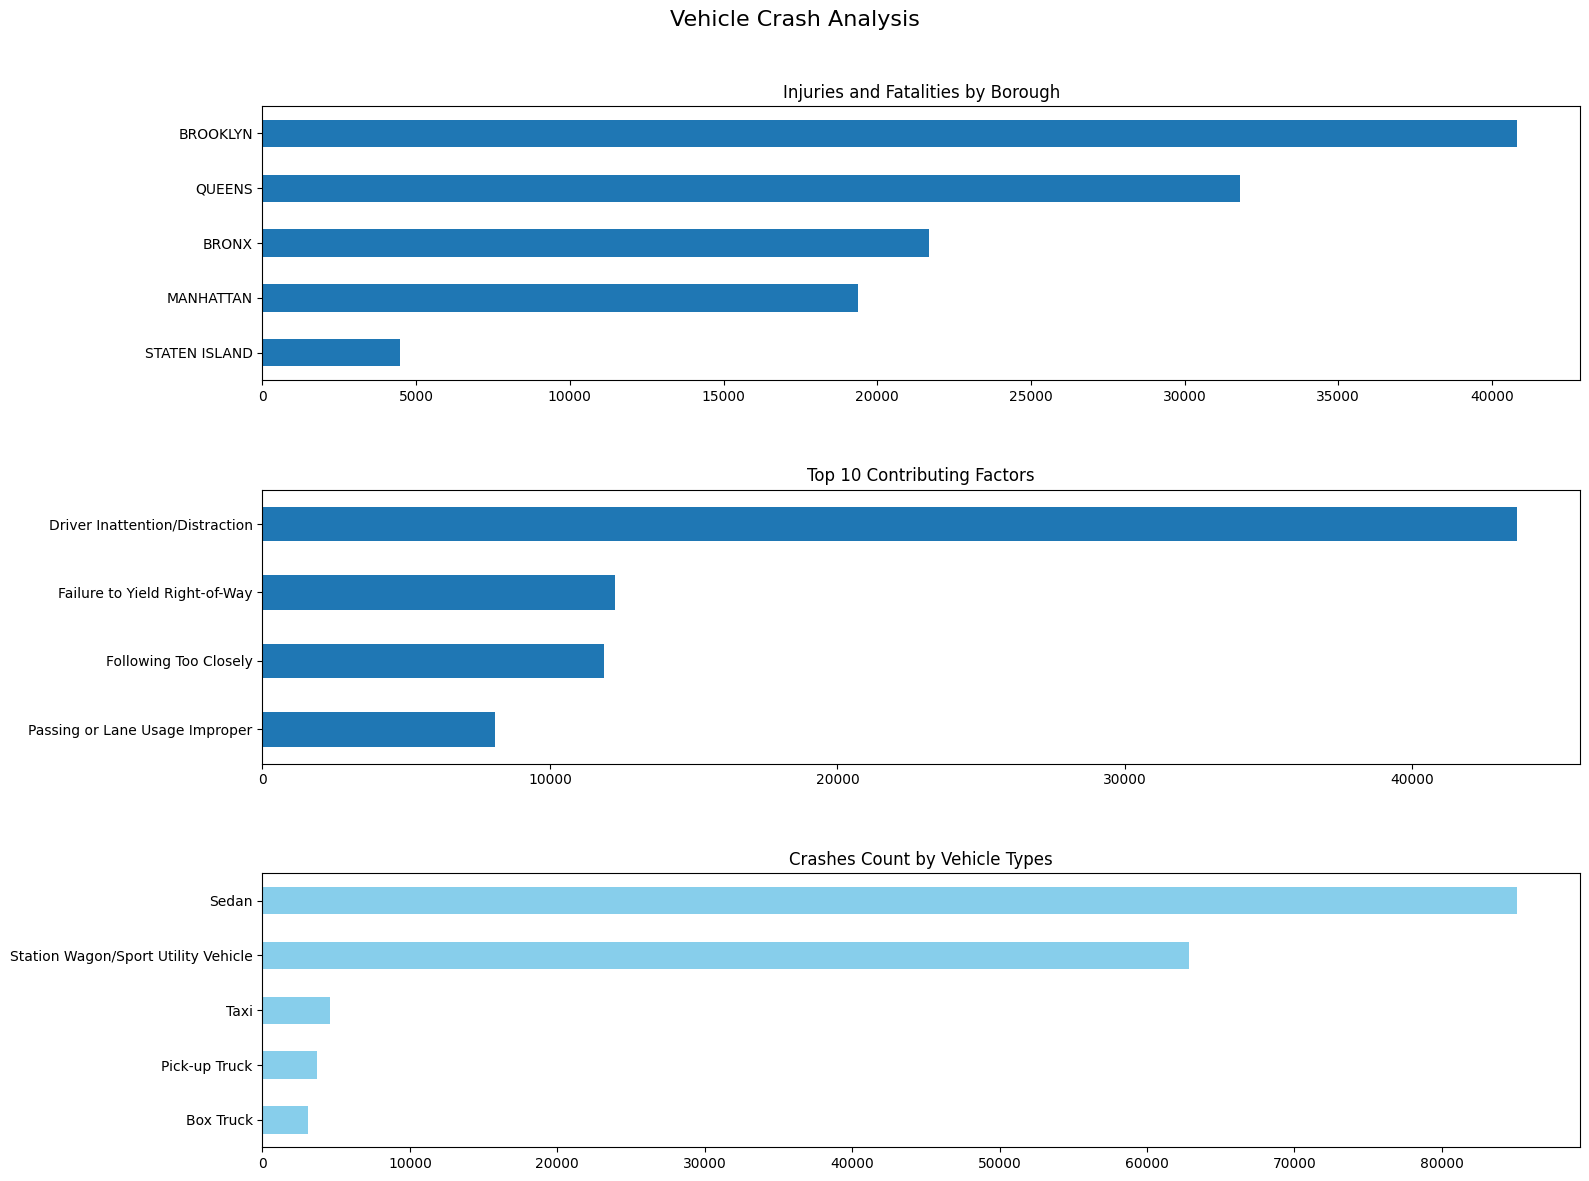

In [38]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
fig.suptitle('Vehicle Crash Analysis', fontsize=16)

# Crashes per Borough
borough_crashes= df['borough'].value_counts().sort_values(ascending=True)
borough_crashes.drop('Unknown', inplace=True)
borough_crashes.plot(kind='barh',  ax=axes[0],title='Injuries and Fatalities by Borough')
axes[0].set_ylabel('')

#Contributing factors
contributing_factors =df['contributing_factor_vehicle_1'].value_counts().sort_values(ascending=False).head(5)
contributing_factors.drop('Unspecified', inplace=True,errors='ignore')
contributing_factors.sort_values().plot(kind='barh', ax=axes[1], title='Top 10 Contributing Factors')
axes[1].set_ylabel('')

#Most Cars involved in crashes
vehicle_types= df['vehicle_type_code_1'].value_counts().head(5)
vehicle_types.sort_values().plot(kind='barh', ax=axes[2], title='Crashes Count by Vehicle Types', color= 'skyblue')
axes[2].set_ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.90, hspace=0.4)  # Leave space for suptitle
plt.show()

The above code snippet provides a clear and structured visualization of key factors contributing to vehicle crashes using three horizontal bar plots. Here's a breakdown of the visual analysis:

### 🏙️ Injuries and Fatalities by Borough
- The first subplot shows the distribution of crashes across NYC boroughs, excluding unknown entries.
- **Brooklyn** has the highest number of incidents, followed by **Queens**, while **Staten Island** has the fewest.
- This may reflect **traffic density** and **population differences** across boroughs.

### ⚠️ Top Contributing Factors
- The second plot highlights the **top reasons for crashes**.
- **Driver Inattention/Distraction** is by far the **leading cause**, significantly higher than other factors.
- Other notable causes include:
  - *Failure to Yield Right-of-Way*
  - *Following Too Closely*
  - *Improper Lane Usage*
- These insights can guide **targeted traffic safety campaigns**.

### 🚗 Crashes Count by Vehicle Types
- The third chart focuses on the types of vehicles most commonly involved in crashes.
- **Sedans** and **SUVs** are the top contributors, likely due to their **prevalence on the roads**.
- **Taxis**, **Pick-up Trucks**, and **Box Trucks** also appear frequently but with **much lower numbers**.

---

Overall, this multi-panel visualization provides a **comprehensive snapshot** of crash data — identifying **where**, **why**, and **with what types of vehicles** most accidents occur. This is highly valuable for **urban planning**, **policy-making**, and **safety improvements**.


# Spatial Distribution of Vehicle Crashes

In [41]:
import folium
from folium.plugins import MarkerCluster

# Filter out rows with missing coordinates
gdf = gpd.GeoDataFrame(df_valid_coords, geometry=gpd.points_from_xy(df_valid_coords['longitude'], df_valid_coords['latitude'], crs='EPSG:4326'))
crash_data= gdf.sample(n=1000)
# Create a base map centered around NYC
map_center = [gdf['latitude'].mean(), gdf['longitude'].mean()]
crash_map = folium.Map(location=map_center, zoom_start=11, tiles='OpenStreetMap')

# Add marker clusters to avoid clutter
marker_cluster = MarkerCluster().add_to(crash_map)

# Add crash markers to the map
for _, row in crash_data.iterrows():
    location = [row['latitude'], row['longitude']]
    popup_info = f"Borough: {row.get('borough', 'N/A')}<br>Injuries: {row.get('total_injured', 0)}<br>Deaths: {row.get('total_killed', 0)}"
    folium.Marker(location=location, popup=popup_info).add_to(marker_cluster)



In [42]:
crash_map